In [1]:
import time
from ddgs import DDGS

def search_images(term, max_images=1, delay=0.2):
    urls = []
    with DDGS() as ddgs:
        for r in ddgs.images(term, max_results=max_images):
            urls.append(r["image"])
            time.sleep(delay)  
    return urls

In [2]:
urls = search_images('bird photos', max_images=1)
urls[0]

'http://images6.fanpop.com/image/photos/40700000/Colourful-Bird-birds-40741713-1280-960.jpg'

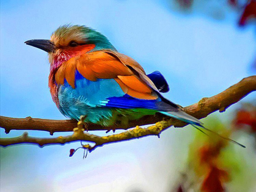

In [3]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

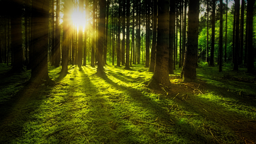

In [ ]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg')
Image.open('forest.jpg').to_thumb(256, 256)

In [ ]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo', 50))
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

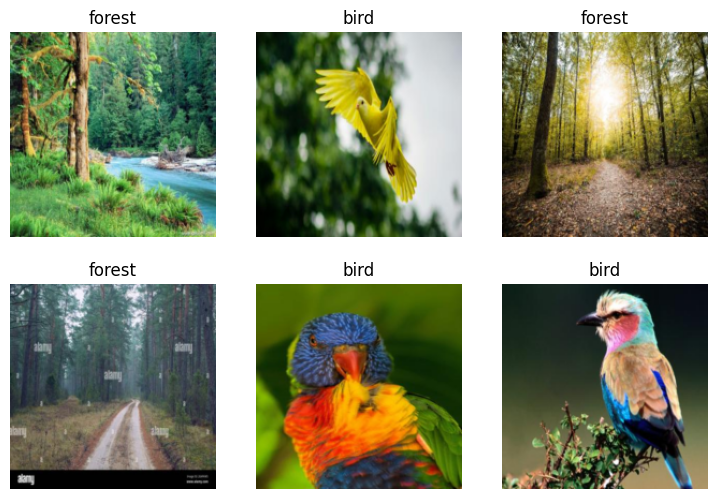

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate) #data, model,
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.654813,0.227687,0.072727,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.030466,0.031754,0.009091,00:25
1,0.014604,0.004753,0.000000,00:25
2,0.009164,0.000431,0.000000,00:27


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9937


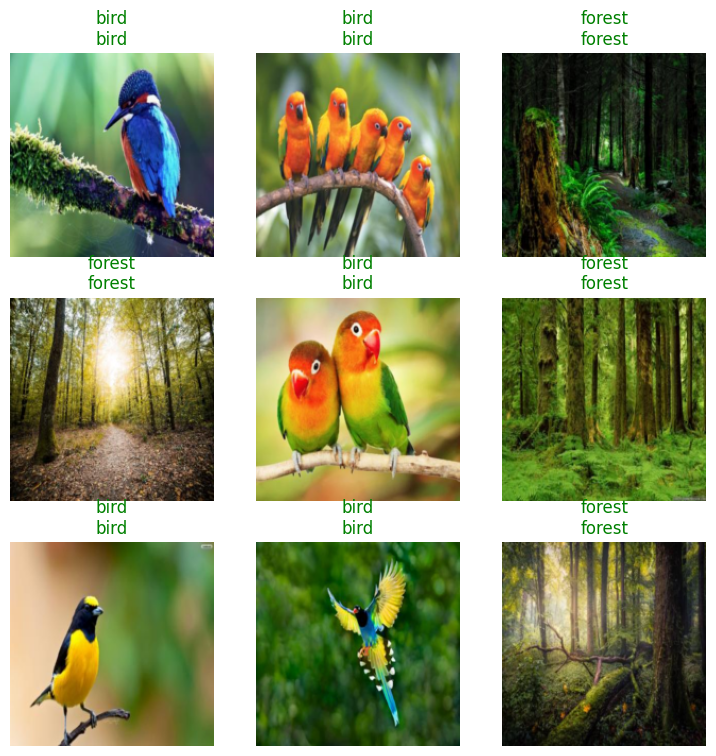

In [ ]:
learn.show_results()